In [3]:
import pandas as pd

# Load your data
df = pd.read_csv("calibrated_ILB_scores_with_cluster5.csv")

# Lists of bank names in your file format for each cluster
cluster_1_banks = [
    "citigroup_inc",
    "goldman_sachs_group,_inc.,_the",
    "morgan_stanley",
    "american_express_company"
]

cluster_4_banks = [
    "u.s._bancorp",
    "pnc_financial_services_group,_inc.,_the",
    "truist_financial_corporation",
    "capital_one_financial_corporation",
    "charles_schwab_corporation,_the",
    "bank_of_new_york_mellon,_the",
    "discover_financial_services",
    "john_deere_capital_corporation"
]

# Filter the dataframe for each cluster
cluster_1_df = df[df['bank_name'].isin(cluster_1_banks)].copy()
cluster_4_df = df[df['bank_name'].isin(cluster_4_banks)].copy()

# Set the order of rows to match the order in your tables
cluster_1_df['bank_name'] = pd.Categorical(cluster_1_df['bank_name'], categories=cluster_1_banks, ordered=True)
cluster_1_df = cluster_1_df.sort_values('bank_name')

cluster_4_df['bank_name'] = pd.Categorical(cluster_4_df['bank_name'], categories=cluster_4_banks, ordered=True)
cluster_4_df = cluster_4_df.sort_values('bank_name')

# Select just the score columns to display
score_columns = ['bank_name', 'Data_calibrated_score', 'Analytics_calibrated_score',
                 'Technology_calibrated_score', 'Analog_calibrated_score']

# Save or print the tables
print("Cluster 1 – Adapting Giants")
print(cluster_1_df[score_columns].to_string(index=False))

print("\nCluster 4 – Modernizing Regionals")
print(cluster_4_df[score_columns].to_string(index=False))


Cluster 1 – Adapting Giants
                     bank_name  Data_calibrated_score  Analytics_calibrated_score  Technology_calibrated_score  Analog_calibrated_score
                 citigroup_inc               2.657355                    2.944437                     2.399179                 2.902069
goldman_sachs_group,_inc.,_the               2.695170                    2.997755                     2.426984                 2.952524
                morgan_stanley               2.674151                    2.968119                     2.411529                 2.924479
      american_express_company               2.596788                    2.859042                     2.354645                 2.821260

Cluster 4 – Modernizing Regionals
                              bank_name  Data_calibrated_score  Analytics_calibrated_score  Technology_calibrated_score  Analog_calibrated_score
                           u.s._bancorp               2.505926                    2.730931                     2

In [4]:
cluster_1_df[score_columns].to_csv("cluster_1_scores.csv", index=False)
cluster_4_df[score_columns].to_csv("cluster_4_scores.csv", index=False)


MORE ANALYSIS

In [7]:
import pandas as pd

# Load datasets
scores_df = pd.read_csv("calibrated_ILB_scores_with_cluster5.csv")
income_df = pd.read_csv("bank_net_income_2024.csv")
composite_df = pd.read_csv("Combined_Scoring.csv")

# Normalize bank names for accurate merging
def normalize_name(name):
    return name.lower().replace(',', '').replace('.', '').replace('&', 'and').replace('-', '').replace('_', '').replace(' ', '')

scores_df['bank_normalized'] = scores_df['bank_name'].apply(normalize_name)
income_df['bank_normalized'] = income_df['bank_name'].apply(normalize_name)
composite_df['bank_normalized'] = composite_df['Company Name'].apply(normalize_name)

# Merge all files on normalized bank name
merged_df = scores_df.merge(income_df[['bank_normalized', '2024 Net Income']], on='bank_normalized', how='left')
merged_df = merged_df.merge(composite_df[['bank_normalized', 'Composite Score']], on='bank_normalized', how='left')

# Final formatting
final_df = merged_df.drop(columns=['bank_normalized'])
final_df = final_df.rename(columns={'bank_name': 'Bank Name'})

# Export one CSV per cluster
for cluster_id in sorted(final_df['cluster'].unique()):
    cluster_df = final_df[final_df['cluster'] == cluster_id]
    cluster_df.to_csv(f"cluster_{cluster_id}_with_all_scores.csv", index=False)


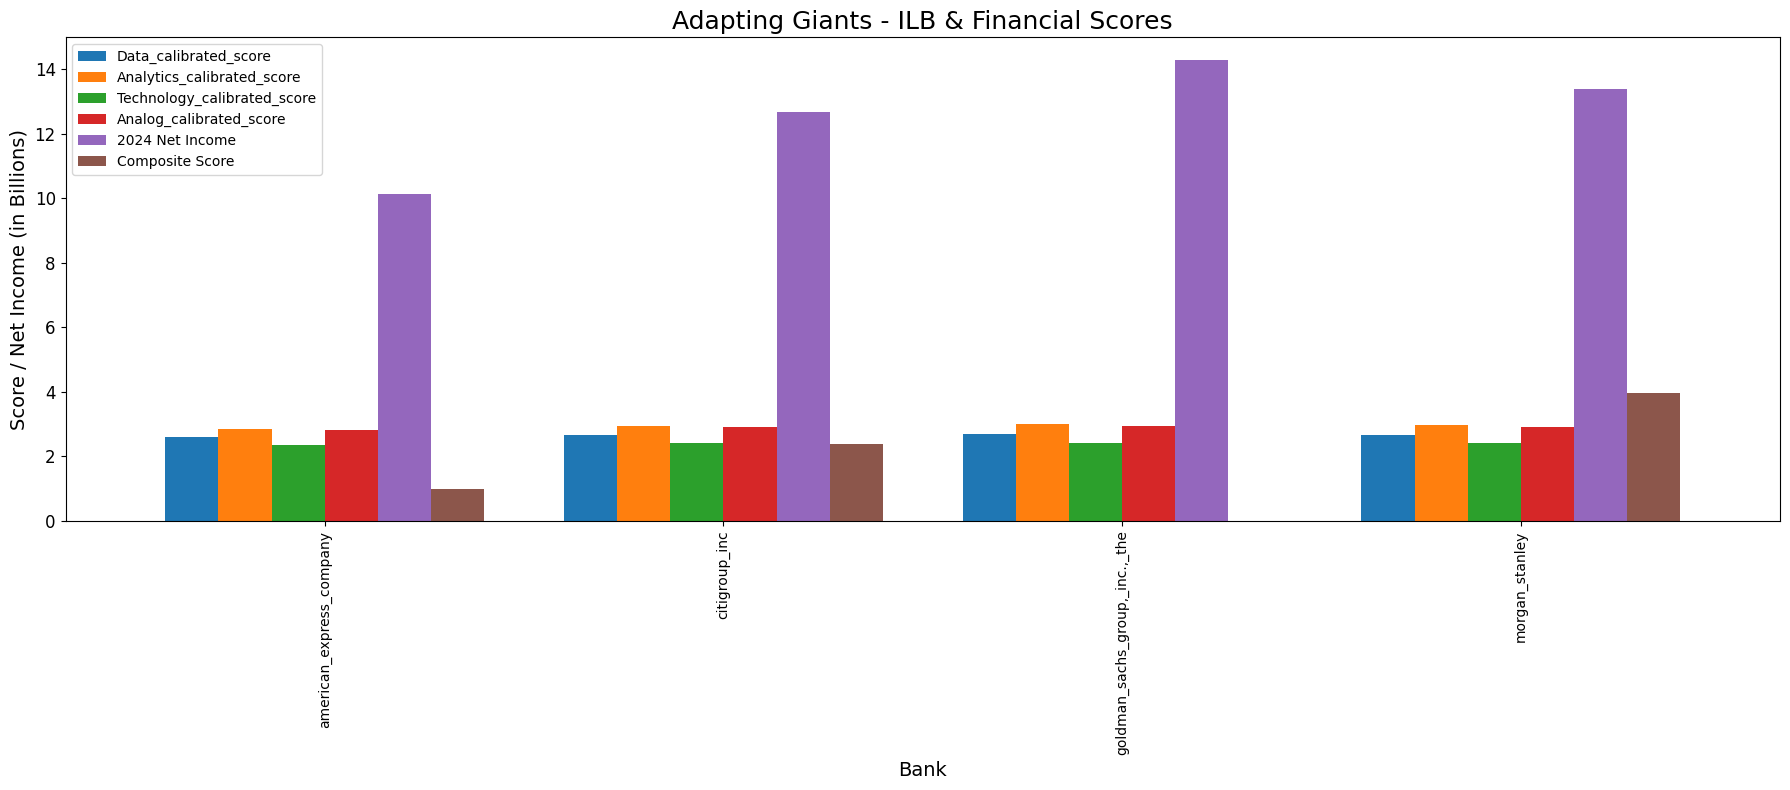

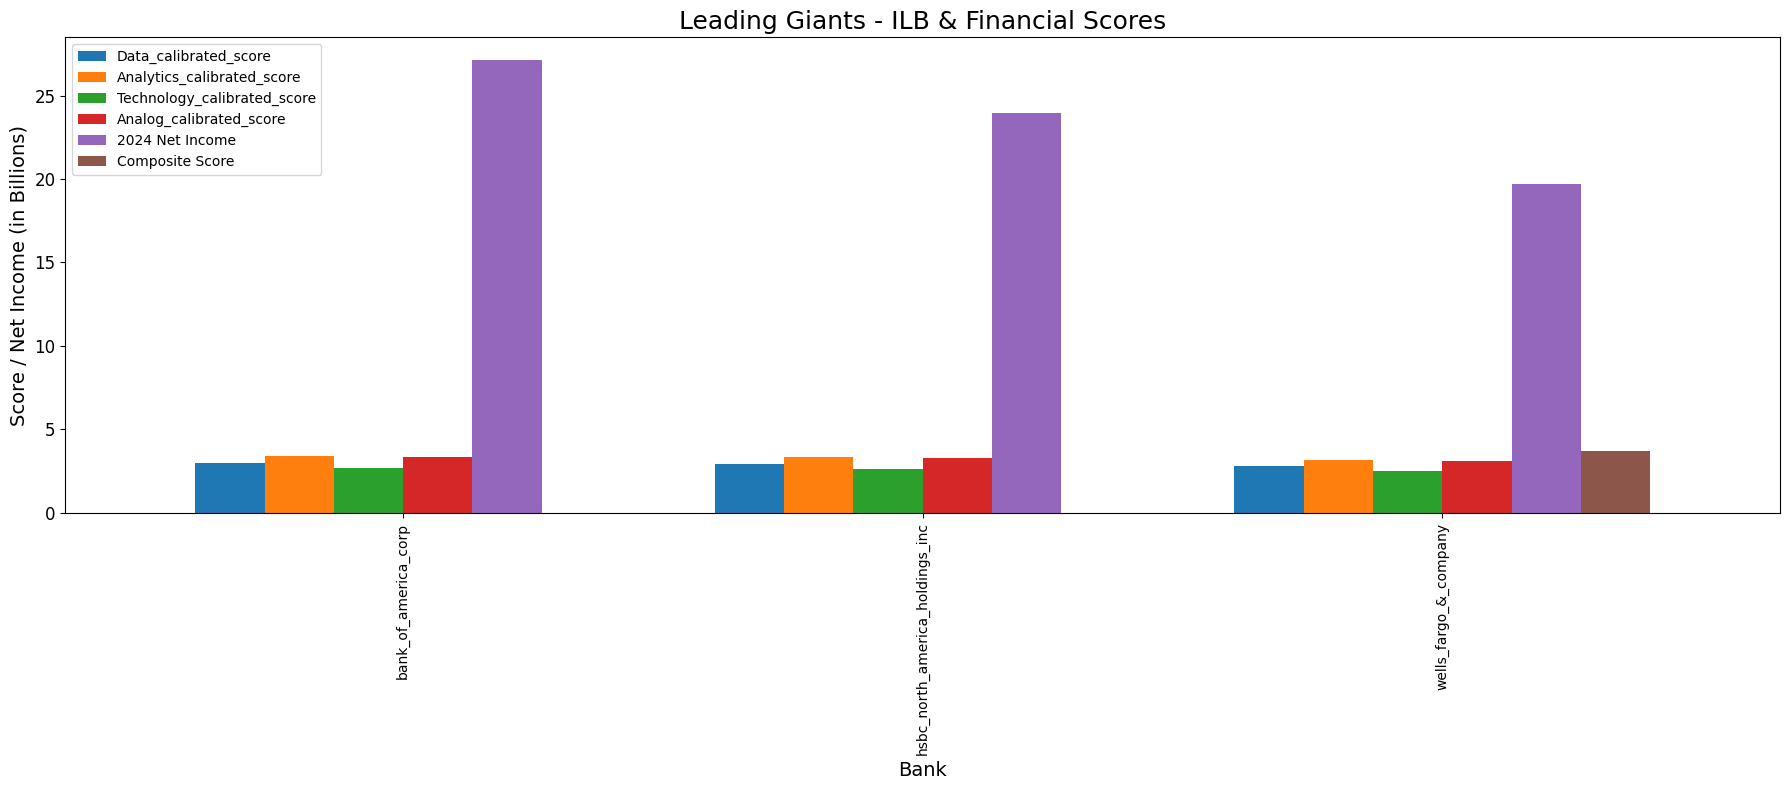

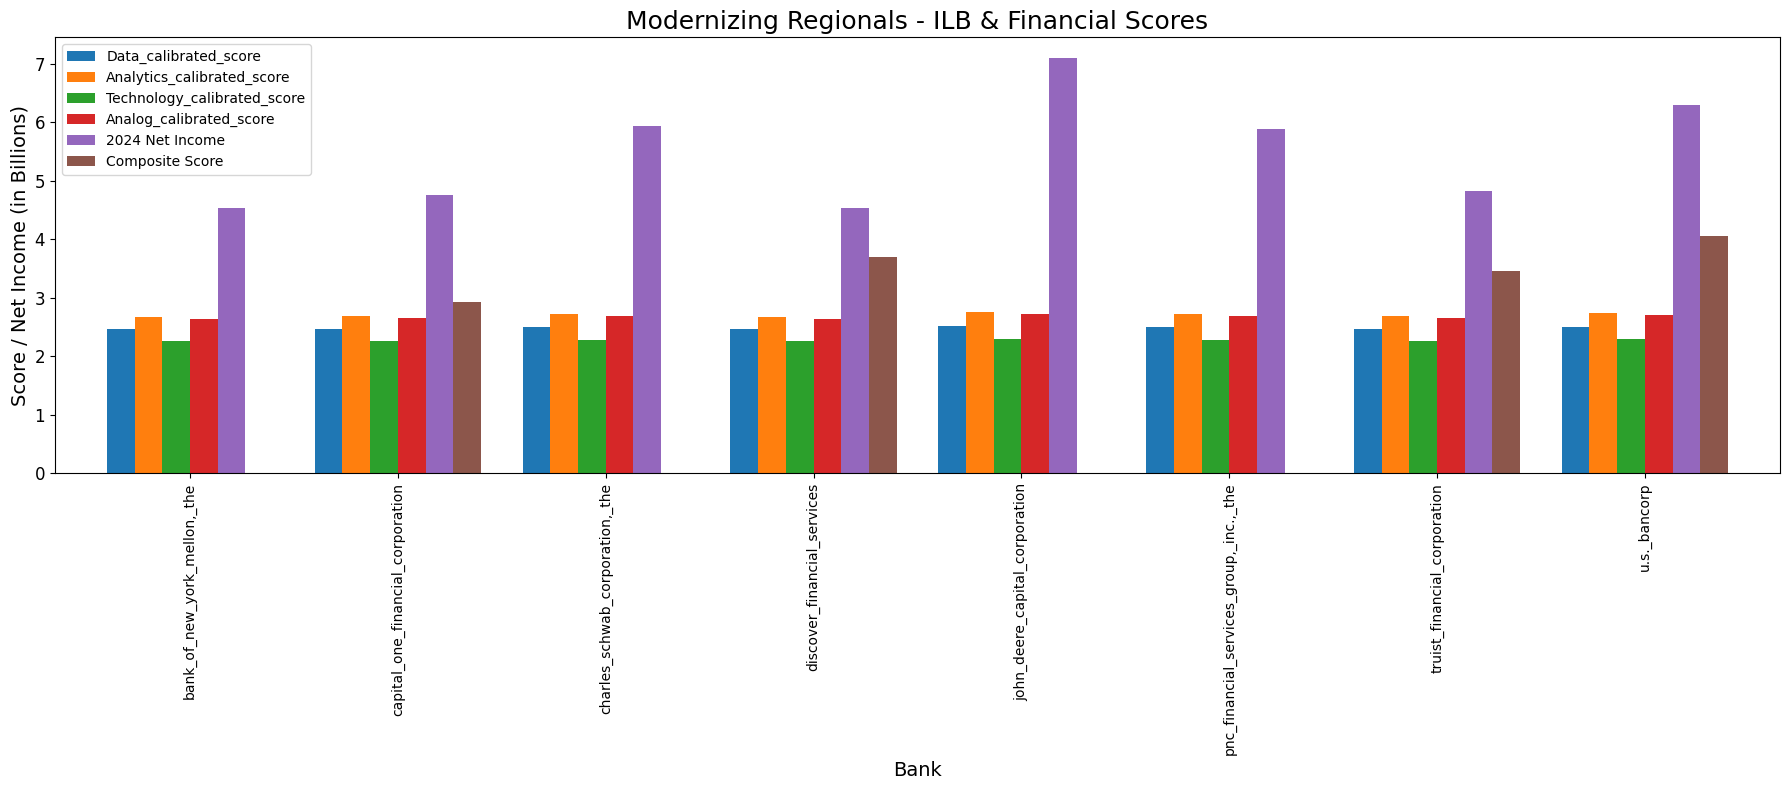

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up file paths and cluster names
cluster_files = {
    1: ("Adapting Giants", "cluster_1_with_all_scores.csv"),
    2: ("Leading Giants", "cluster_2_with_all_scores.csv"),
    4: ("Modernizing Regionals", "cluster_4_with_all_scores.csv")
}

# Define the score columns to plot
score_columns = [
    'Data_calibrated_score',
    'Analytics_calibrated_score',
    'Technology_calibrated_score',
    'Analog_calibrated_score',
    '2024 Net Income',
    'Composite Score'
]

# Create a bar chart for each cluster
for cluster_id, (cluster_name, filepath) in cluster_files.items():
    df = pd.read_csv(filepath)

    # Convert net income to billions
    df["2024 Net Income"] = df["2024 Net Income"] / 1e9  # for readability
    df = df.set_index("Bank Name")  # Use bank names as labels

    # Plotting
    ax = df[score_columns].plot(kind='bar', figsize=(18, 8), width=0.8)

    plt.title(f"{cluster_name} - ILB & Financial Scores", fontsize=18)
    plt.ylabel("Score / Net Income (in Billions)", fontsize=14)
    plt.xlabel("Bank", fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()


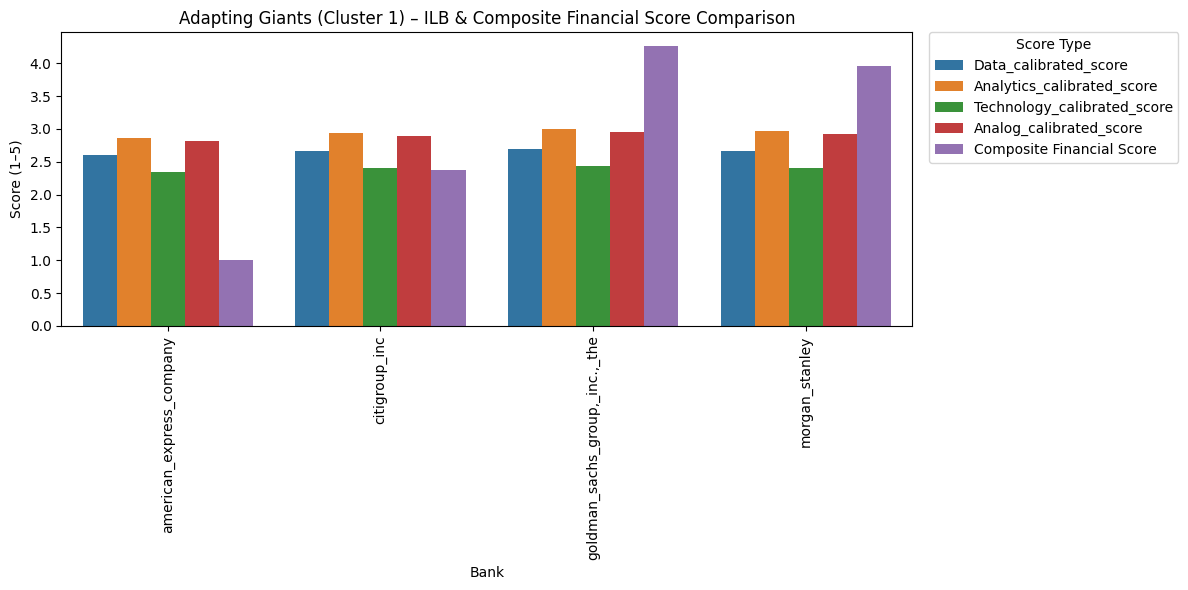

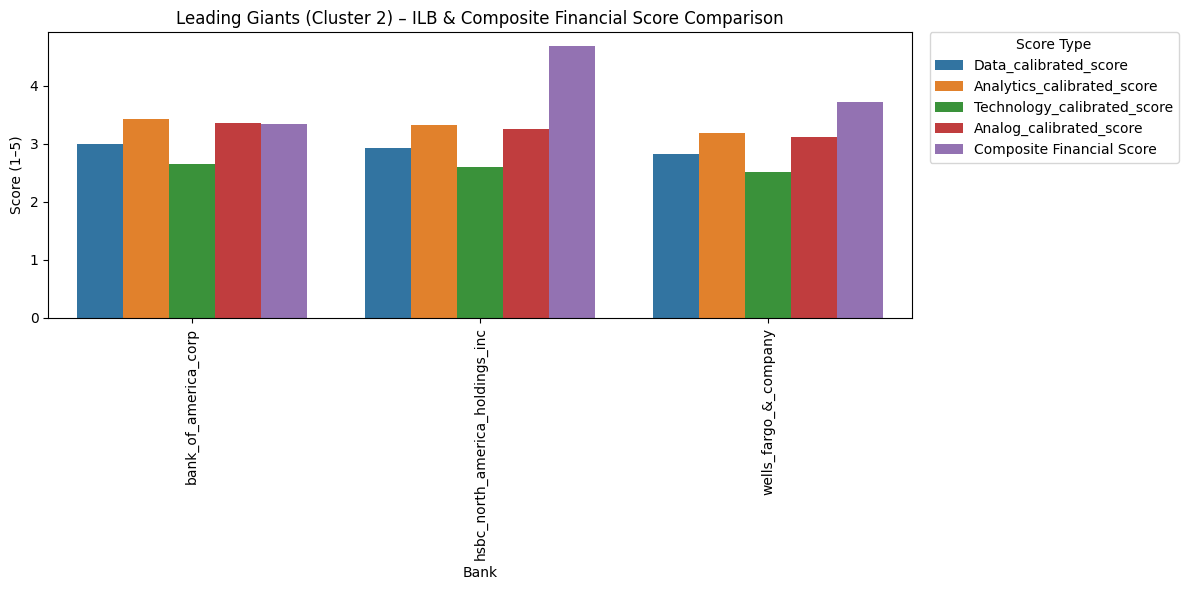

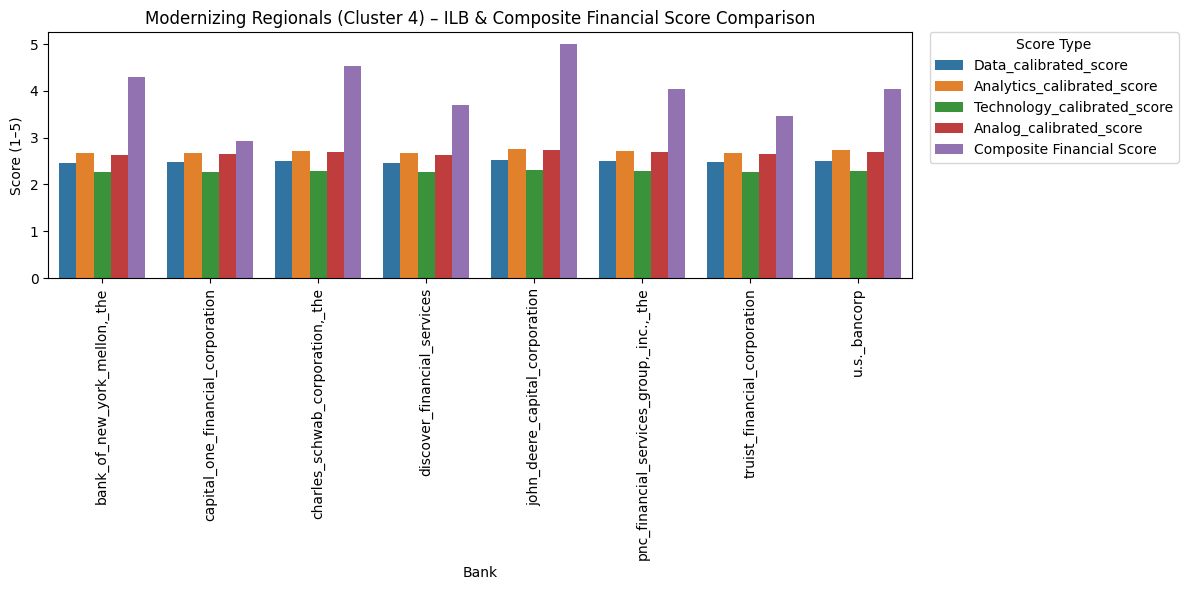

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cluster 1 - Adapting Giants
cluster_1 = pd.DataFrame({
    'Bank': ['american_express_company', 'citigroup_inc', 'goldman_sachs_group,_inc.,_the', 'morgan_stanley'],
    'Data_calibrated_score': [2.60, 2.66, 2.70, 2.67],
    'Analytics_calibrated_score': [2.86, 2.94, 3.00, 2.97],
    'Technology_calibrated_score': [2.35, 2.40, 2.43, 2.41],
    'Analog_calibrated_score': [2.82, 2.90, 2.95, 2.92],
    'Composite Financial Score': [1.00, 2.38, 4.26, 3.96]
})

# Cluster 2 - Leading Giants
cluster_2 = pd.DataFrame({
    'Bank': ['bank_of_america_corp', 'hsbc_north_america_holdings_inc', 'wells_fargo_&_company'],
    'Data_calibrated_score': [3.00, 2.93, 2.82],
    'Analytics_calibrated_score': [3.43, 3.32, 3.18],
    'Technology_calibrated_score': [2.65, 2.60, 2.52],
    'Analog_calibrated_score': [3.36, 3.26, 3.12],
    'Composite Financial Score': [3.35, 4.69, 3.72]
})

# Cluster 4 - Modernizing Regionals
cluster_4 = pd.DataFrame({
    'Bank': [
        'bank_of_new_york_mellon,_the', 'capital_one_financial_corporation', 'charles_schwab_corporation,_the',
        'discover_financial_services', 'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
        'truist_financial_corporation', 'u.s._bancorp'
    ],
    'Data_calibrated_score': [2.46, 2.47, 2.50, 2.46, 2.52, 2.50, 2.47, 2.51],
    'Analytics_calibrated_score': [2.67, 2.68, 2.72, 2.67, 2.76, 2.72, 2.68, 2.73],
    'Technology_calibrated_score': [2.26, 2.27, 2.28, 2.26, 2.30, 2.29, 2.26, 2.28],
    'Analog_calibrated_score': [2.64, 2.65, 2.69, 2.64, 2.73, 2.69, 2.65, 2.70],
    'Composite Financial Score': [4.29, 2.93, 4.54, 3.70, 5.00, 4.04, 3.46, 4.05]
})

# Function to plot scores for a cluster
def plot_cluster_scores(df, cluster_title):
    plot_df = df.melt(id_vars='Bank', var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=plot_df, x='Bank', y='Score', hue='Score Type')
    plt.xticks(rotation=90)
    plt.ylabel("Score (1–5)")
    plt.xlabel("Bank")
    plt.title(f"{cluster_title} – ILB & Composite Financial Score Comparison")

    # Move legend to the right
    plt.legend(title='Score Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.tight_layout()
    plt.show()

# Plot each cluster
plot_cluster_scores(cluster_1, "Adapting Giants (Cluster 1)")
plot_cluster_scores(cluster_2, "Leading Giants (Cluster 2)")
plot_cluster_scores(cluster_4, "Modernizing Regionals (Cluster 4)")


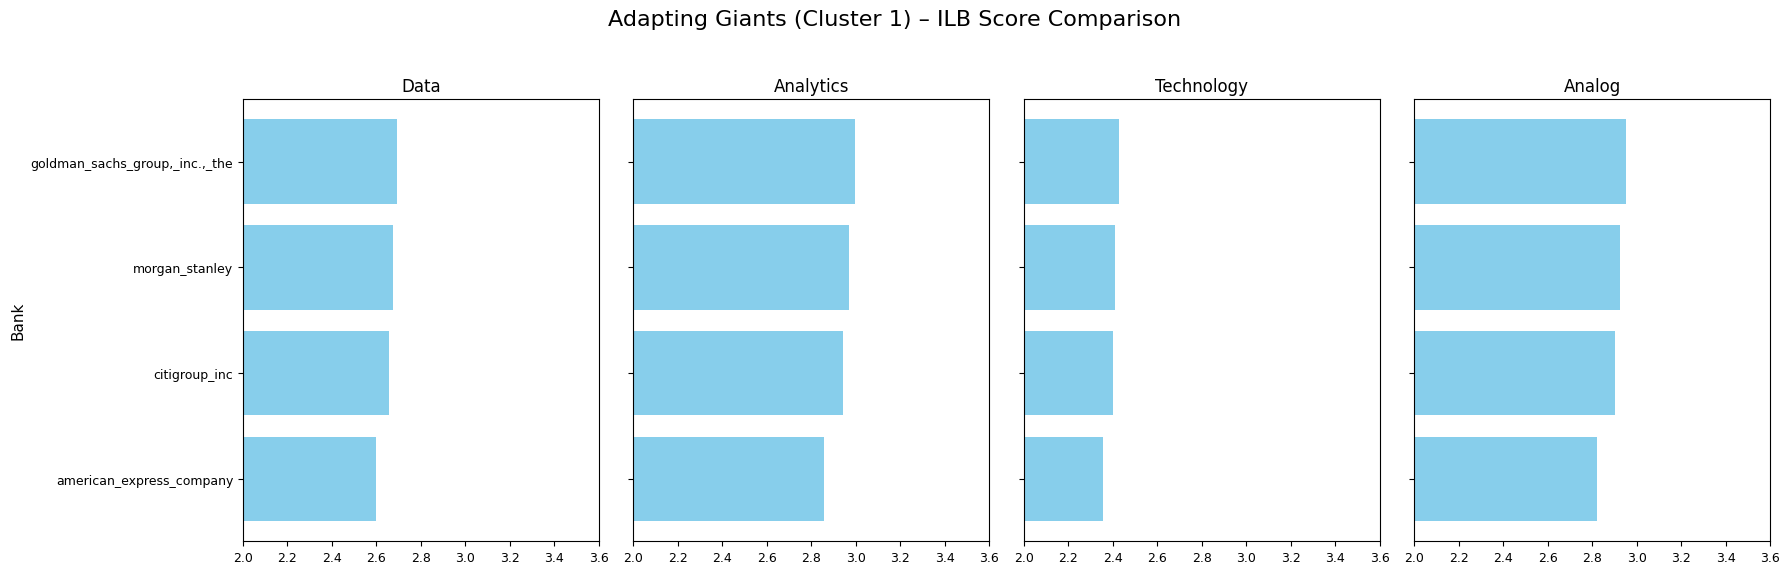

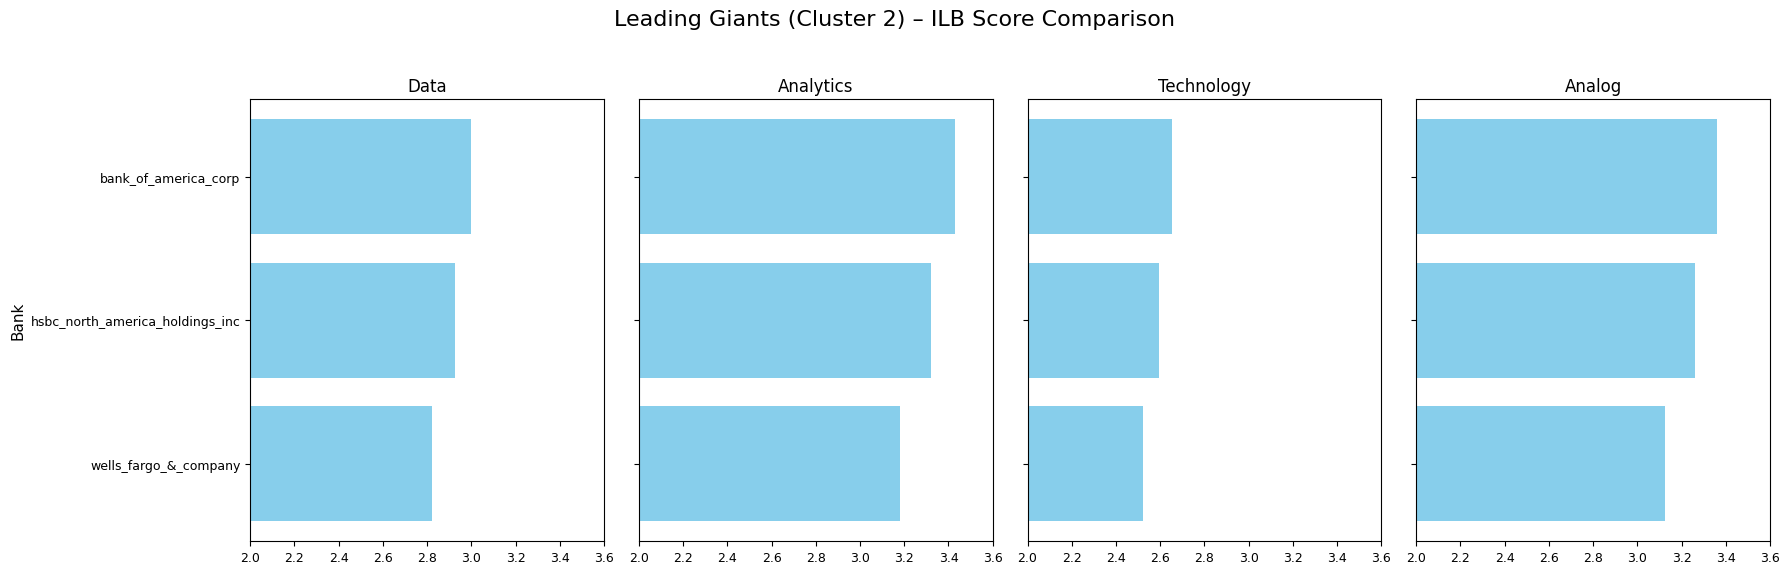

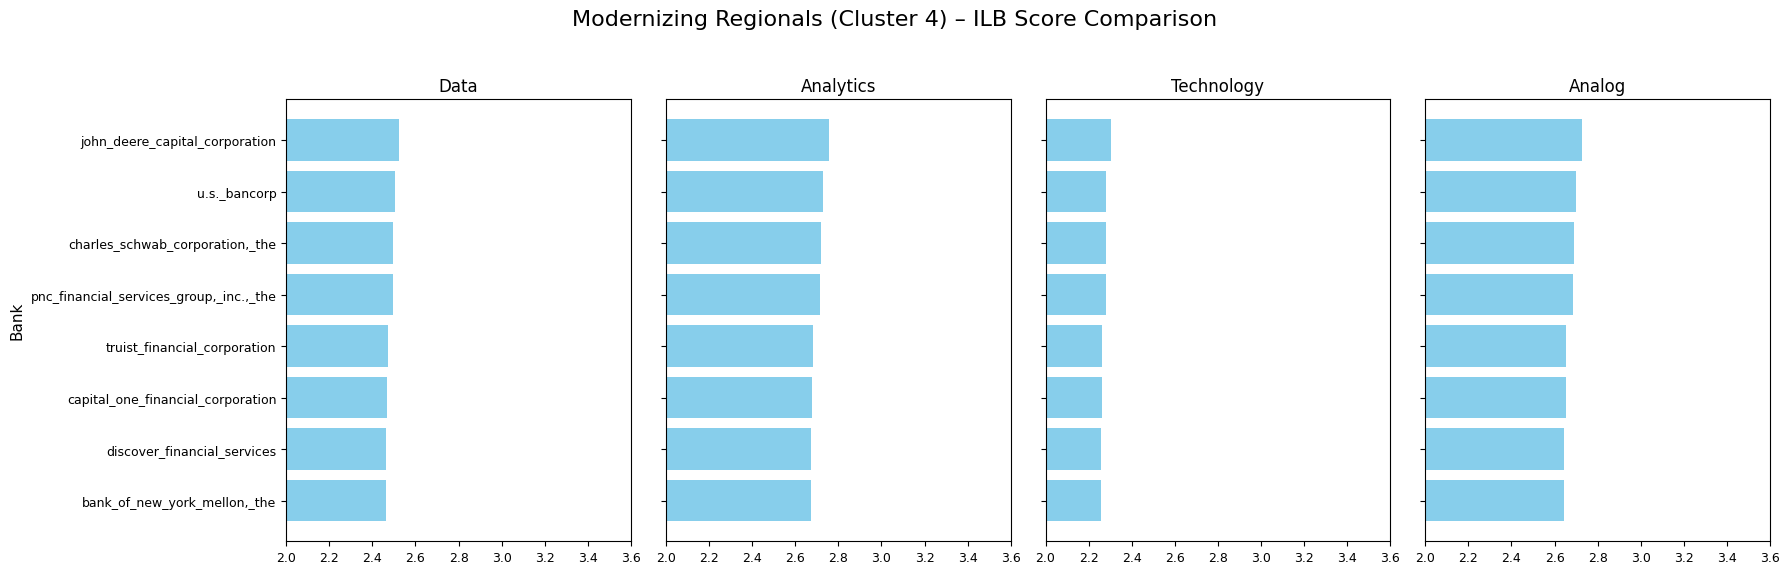

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Define data for each cluster
cluster_data = {
    "Adapting Giants (Cluster 1)": {
        'Bank Name': [
            'american_express_company', 'citigroup_inc',
            'goldman_sachs_group,_inc.,_the', 'morgan_stanley'
        ],
        'Data_calibrated_score': [2.5968, 2.6574, 2.6952, 2.6742],
        'Analytics_calibrated_score': [2.8590, 2.9444, 2.9978, 2.9681],
        'Technology_calibrated_score': [2.3546, 2.3992, 2.4269, 2.4115],
        'Analog_calibrated_score': [2.8213, 2.9021, 2.9525, 2.9245],
    },
    "Leading Giants (Cluster 2)": {
        'Bank Name': [
            'bank_of_america_corp', 'hsbc_north_america_holdings_inc',
            'wells_fargo_&_company'
        ],
        'Data_calibrated_score': [3.0002, 2.9254, 2.8244],
        'Analytics_calibrated_score': [3.4278, 3.3223, 3.1799],
        'Technology_calibrated_score': [2.6512, 2.5962, 2.5220],
        'Analog_calibrated_score': [3.3595, 3.2596, 3.1249],
    },
    "Modernizing Regionals (Cluster 4)": {
        'Bank Name': [
            'bank_of_new_york_mellon,_the', 'capital_one_financial_corporation',
            'charles_schwab_corporation,_the', 'discover_financial_services',
            'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
            'truist_financial_corporation', 'u.s._bancorp'
        ],
        'Data_calibrated_score': [2.4631, 2.4698, 2.4975, 2.4641, 2.5249, 2.4969, 2.4708, 2.5053],
        'Analytics_calibrated_score': [2.6718, 2.6792, 2.7190, 2.6719, 2.7577, 2.7172, 2.6814, 2.7309],
        'Technology_calibrated_score': [2.2569, 2.2608, 2.2816, 2.2571, 2.3018, 2.2807, 2.2600, 2.2784],
        'Analog_calibrated_score': [2.6440, 2.6510, 2.6887, 2.6442, 2.7254, 2.6871, 2.6532, 2.7003],
    }
}

score_types = ['Data_calibrated_score', 'Analytics_calibrated_score',
               'Technology_calibrated_score', 'Analog_calibrated_score']

# Create a figure per cluster
for cluster_name, data in cluster_data.items():
    df = pd.DataFrame(data)

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharey=True)
    fig.suptitle(f"{cluster_name} – ILB Score Comparison", fontsize=16)

    for i, score in enumerate(score_types):
        sorted_df = df.sort_values(score, ascending=True)
        axes[i].barh(sorted_df['Bank Name'], sorted_df[score], color='skyblue')
        axes[i].set_title(score.replace('_calibrated_score', ''), fontsize=12)
        axes[i].set_xlim(2, 3.6)
        axes[i].tick_params(labelsize=9)
        if i == 0:
            axes[i].set_ylabel("Bank", fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
    plt.show()


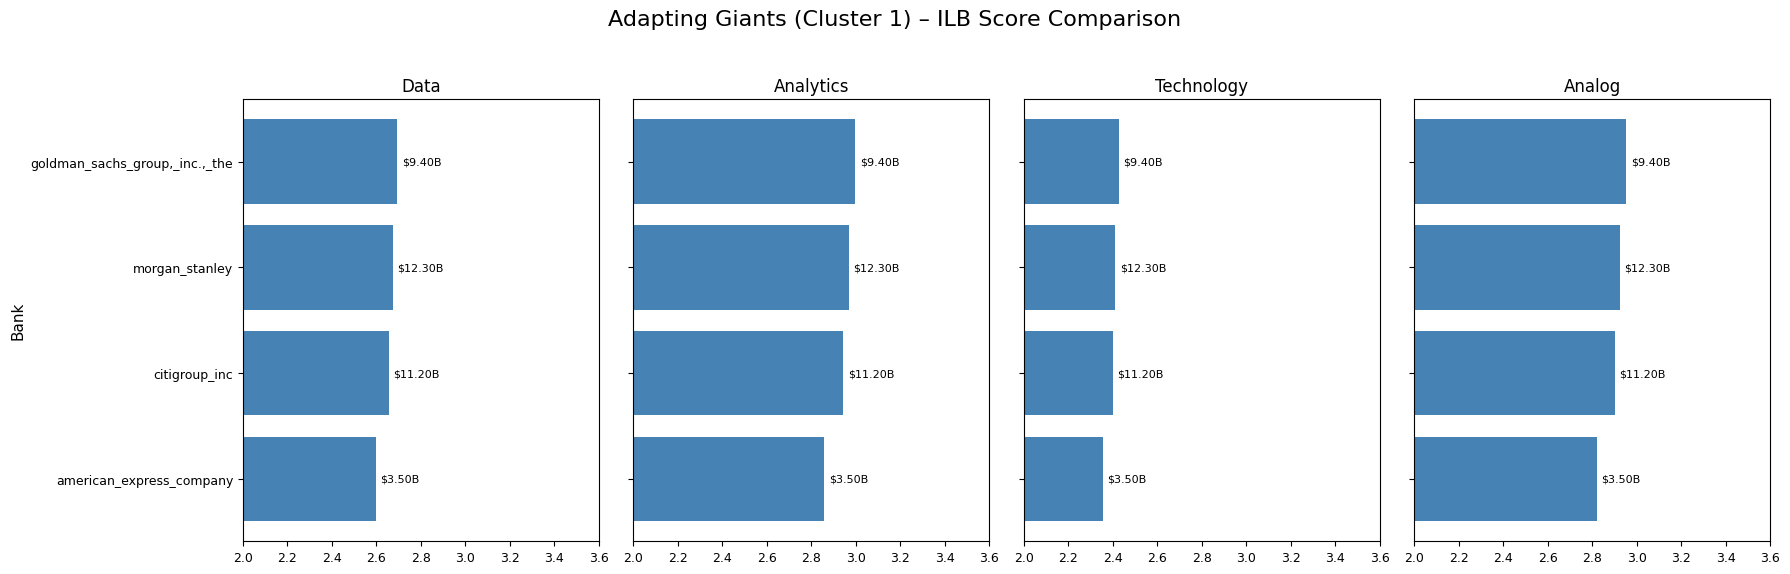

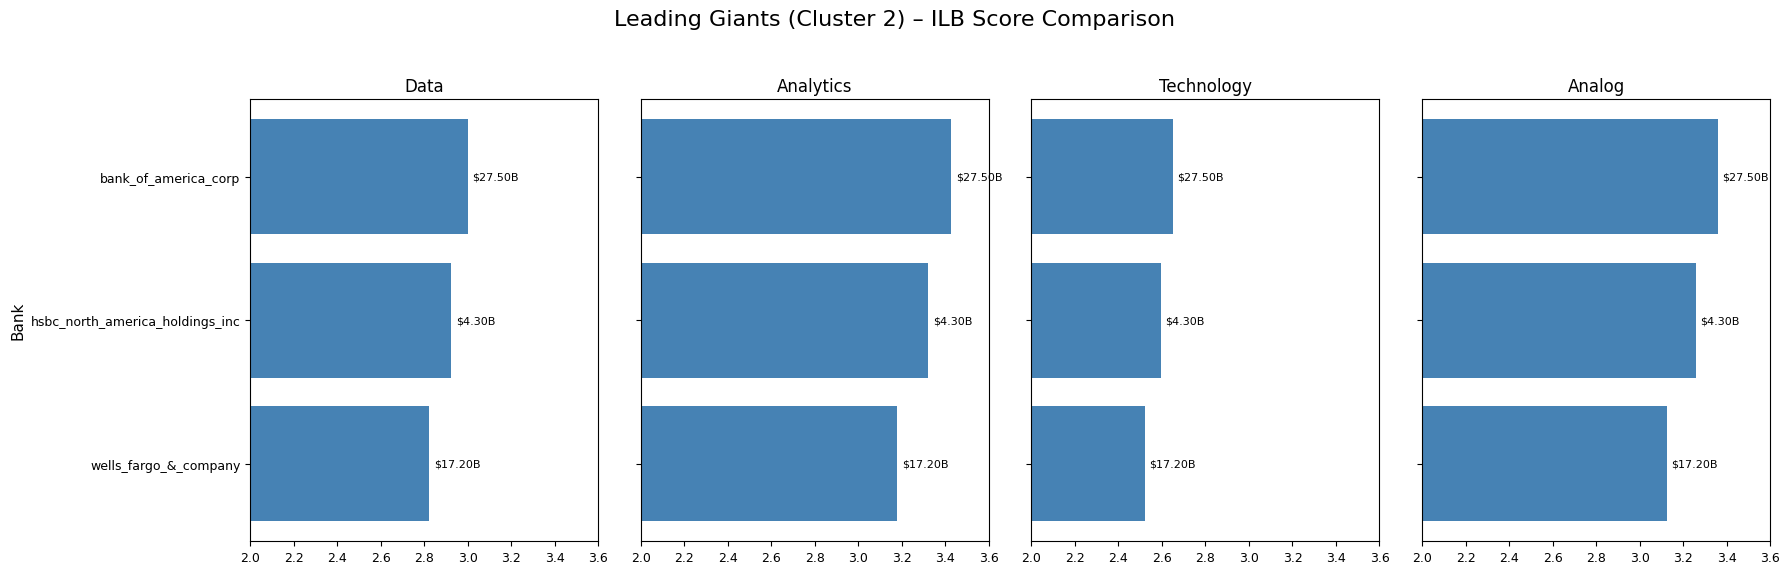

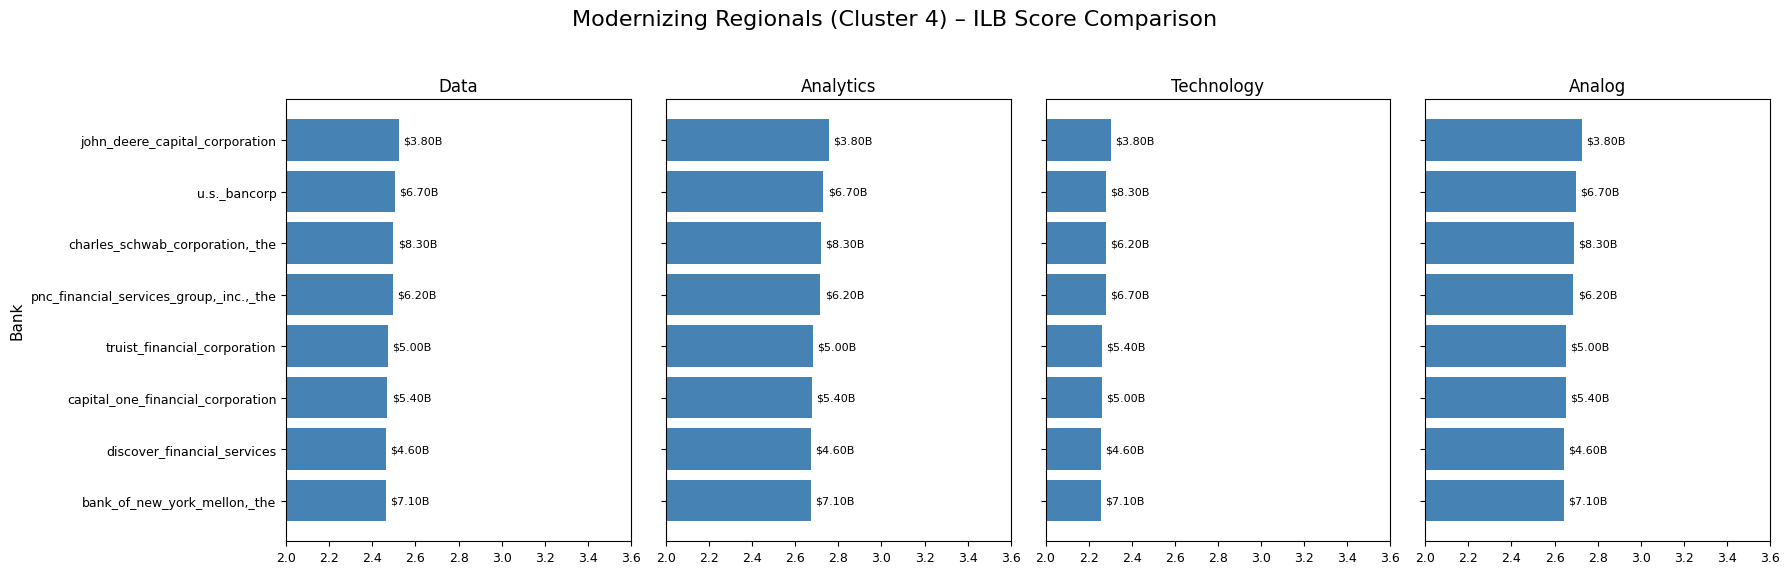

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Net Income values (replace with actual numbers in millions or billions)
# Example values for demo purposes:
net_income_cluster_1 = [3.5e9, 11.2e9, 9.4e9, 12.3e9]
net_income_cluster_2 = [27.5e9, 4.3e9, 17.2e9]
net_income_cluster_4 = [7.1e9, 5.4e9, 8.3e9, 4.6e9, 3.8e9, 6.2e9, 5.0e9, 6.7e9]

# Define cluster data (with income)
cluster_data = {
    "Adapting Giants (Cluster 1)": {
        'Bank Name': [
            'american_express_company', 'citigroup_inc',
            'goldman_sachs_group,_inc.,_the', 'morgan_stanley'
        ],
        'Data_calibrated_score': [2.5968, 2.6574, 2.6952, 2.6742],
        'Analytics_calibrated_score': [2.8590, 2.9444, 2.9978, 2.9681],
        'Technology_calibrated_score': [2.3546, 2.3992, 2.4269, 2.4115],
        'Analog_calibrated_score': [2.8213, 2.9021, 2.9525, 2.9245],
        '2024 Net Income': net_income_cluster_1
    },
    "Leading Giants (Cluster 2)": {
        'Bank Name': [
            'bank_of_america_corp', 'hsbc_north_america_holdings_inc',
            'wells_fargo_&_company'
        ],
        'Data_calibrated_score': [3.0002, 2.9254, 2.8244],
        'Analytics_calibrated_score': [3.4278, 3.3223, 3.1799],
        'Technology_calibrated_score': [2.6512, 2.5962, 2.5220],
        'Analog_calibrated_score': [3.3595, 3.2596, 3.1249],
        '2024 Net Income': net_income_cluster_2
    },
    "Modernizing Regionals (Cluster 4)": {
        'Bank Name': [
            'bank_of_new_york_mellon,_the', 'capital_one_financial_corporation',
            'charles_schwab_corporation,_the', 'discover_financial_services',
            'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
            'truist_financial_corporation', 'u.s._bancorp'
        ],
        'Data_calibrated_score': [2.4631, 2.4698, 2.4975, 2.4641, 2.5249, 2.4969, 2.4708, 2.5053],
        'Analytics_calibrated_score': [2.6718, 2.6792, 2.7190, 2.6719, 2.7577, 2.7172, 2.6814, 2.7309],
        'Technology_calibrated_score': [2.2569, 2.2608, 2.2816, 2.2571, 2.3018, 2.2807, 2.2600, 2.2784],
        'Analog_calibrated_score': [2.6440, 2.6510, 2.6887, 2.6442, 2.7254, 2.6871, 2.6532, 2.7003],
        '2024 Net Income': net_income_cluster_4
    }
}

score_types = ['Data_calibrated_score', 'Analytics_calibrated_score',
               'Technology_calibrated_score', 'Analog_calibrated_score']

# Plot
for cluster_name, data in cluster_data.items():
    df = pd.DataFrame(data)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharey=True)
    fig.suptitle(f"{cluster_name} – ILB Score Comparison", fontsize=16)

    for i, score in enumerate(score_types):
        sorted_df = df.sort_values(score, ascending=True)
        axes[i].barh(sorted_df['Bank Name'], sorted_df[score], color='steelblue')
        axes[i].set_title(score.replace('_calibrated_score', ''), fontsize=12)
        axes[i].set_xlim(2, 3.6)
        axes[i].tick_params(labelsize=9)

        # Annotate net income on bars
        for j, (val, income) in enumerate(zip(sorted_df[score], sorted_df['2024 Net Income'])):
            axes[i].text(val + 0.02, j, f"${income/1e9:.2f}B", va='center', fontsize=8)

        if i == 0:
            axes[i].set_ylabel("Bank", fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


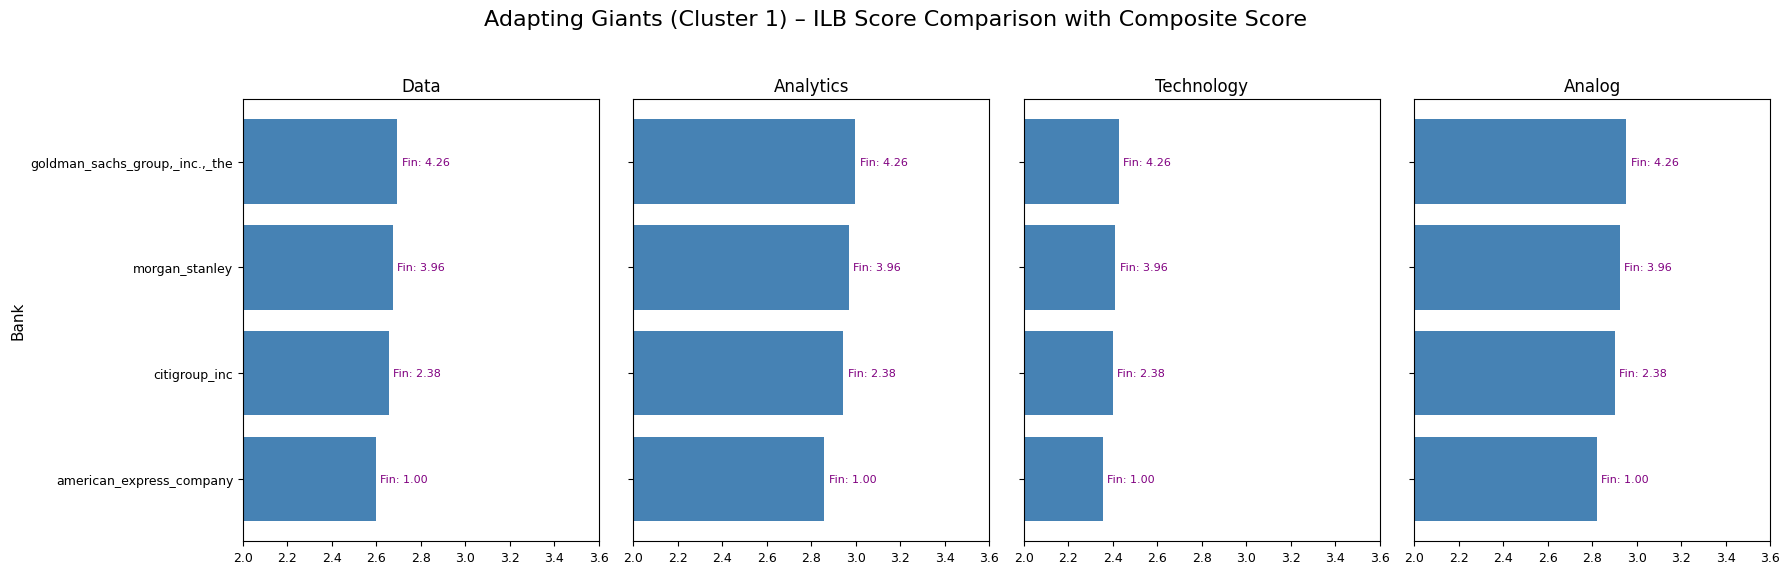

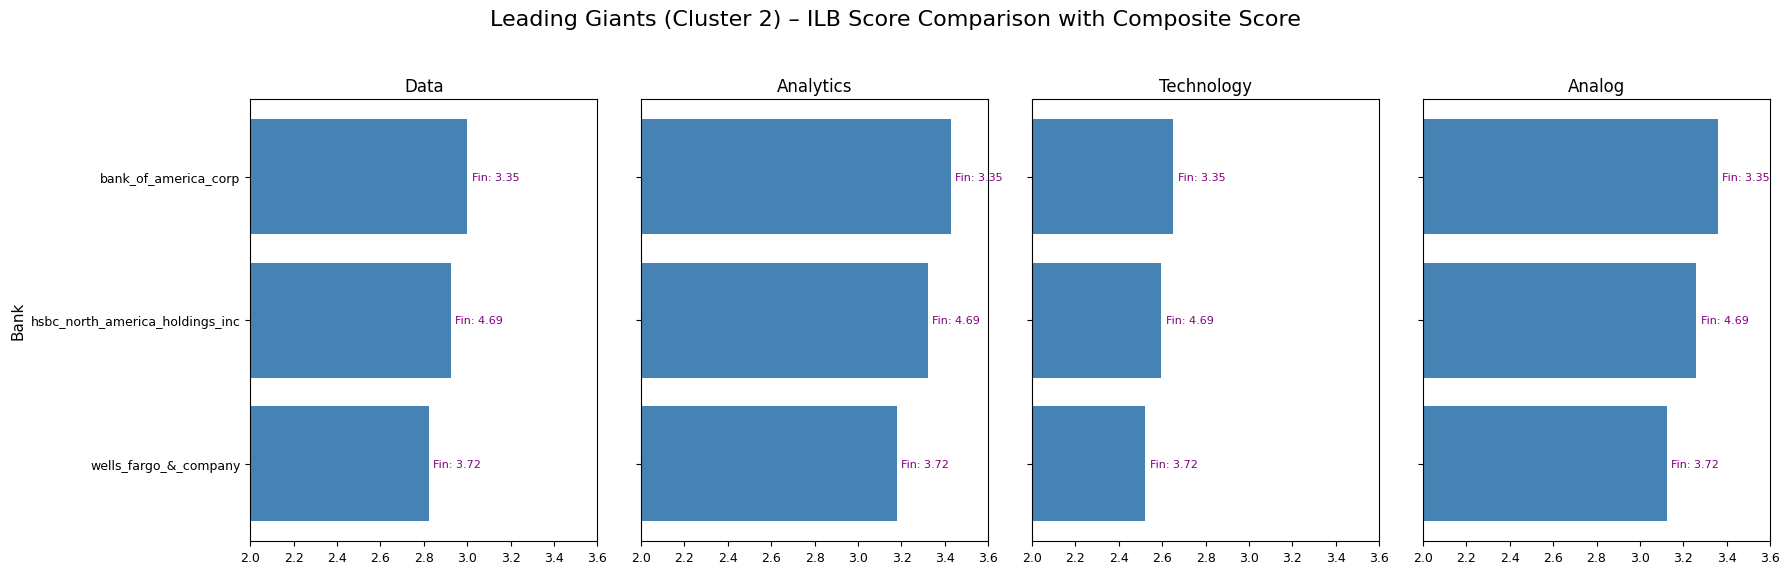

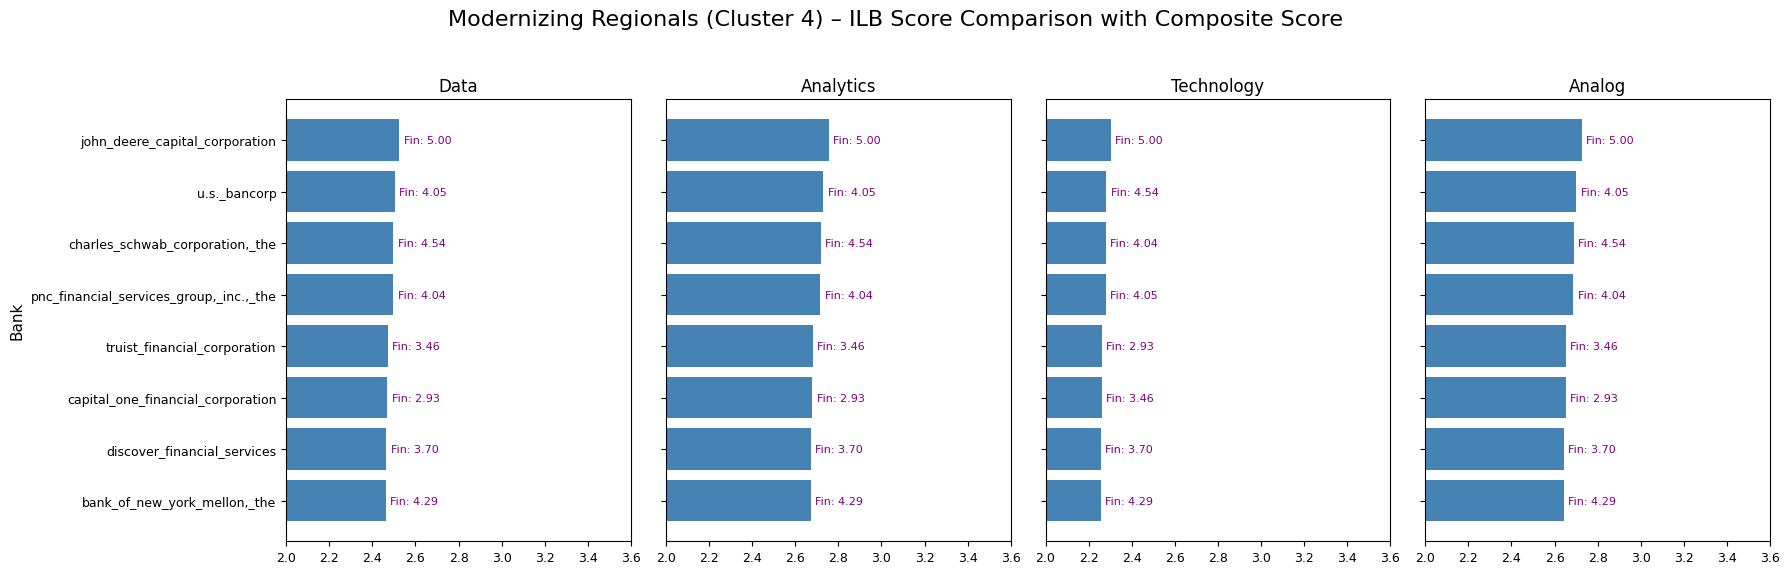

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Net Income (used for ordering, not displayed)
net_income_cluster_1 = [3.5e9, 11.2e9, 9.4e9, 12.3e9]
net_income_cluster_2 = [27.5e9, 4.3e9, 17.2e9]
net_income_cluster_4 = [7.1e9, 5.4e9, 8.3e9, 4.6e9, 3.8e9, 6.2e9, 5.0e9, 6.7e9]

# Financial Composite Scores
composite_scores_cluster_1 = [1.00, 2.38, 4.26, 3.96]
composite_scores_cluster_2 = [3.35, 4.69, 3.72]
composite_scores_cluster_4 = [4.29, 2.93, 4.54, 3.70, 5.00, 4.04, 3.46, 4.05]

# Cluster data
cluster_data = {
    "Adapting Giants (Cluster 1)": {
        'Bank Name': ['american_express_company', 'citigroup_inc', 'goldman_sachs_group,_inc.,_the', 'morgan_stanley'],
        'Data_calibrated_score': [2.5968, 2.6574, 2.6952, 2.6742],
        'Analytics_calibrated_score': [2.8590, 2.9444, 2.9978, 2.9681],
        'Technology_calibrated_score': [2.3546, 2.3992, 2.4269, 2.4115],
        'Analog_calibrated_score': [2.8213, 2.9021, 2.9525, 2.9245],
        '2024 Net Income': net_income_cluster_1,
        'Composite Score': composite_scores_cluster_1
    },
    "Leading Giants (Cluster 2)": {
        'Bank Name': ['bank_of_america_corp', 'hsbc_north_america_holdings_inc', 'wells_fargo_&_company'],
        'Data_calibrated_score': [3.0002, 2.9254, 2.8244],
        'Analytics_calibrated_score': [3.4278, 3.3223, 3.1799],
        'Technology_calibrated_score': [2.6512, 2.5962, 2.5220],
        'Analog_calibrated_score': [3.3595, 3.2596, 3.1249],
        '2024 Net Income': net_income_cluster_2,
        'Composite Score': composite_scores_cluster_2
    },
    "Modernizing Regionals (Cluster 4)": {
        'Bank Name': ['bank_of_new_york_mellon,_the', 'capital_one_financial_corporation',
                      'charles_schwab_corporation,_the', 'discover_financial_services',
                      'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
                      'truist_financial_corporation', 'u.s._bancorp'],
        'Data_calibrated_score': [2.4631, 2.4698, 2.4975, 2.4641, 2.5249, 2.4969, 2.4708, 2.5053],
        'Analytics_calibrated_score': [2.6718, 2.6792, 2.7190, 2.6719, 2.7577, 2.7172, 2.6814, 2.7309],
        'Technology_calibrated_score': [2.2569, 2.2608, 2.2816, 2.2571, 2.3018, 2.2807, 2.2600, 2.2784],
        'Analog_calibrated_score': [2.6440, 2.6510, 2.6887, 2.6442, 2.7254, 2.6871, 2.6532, 2.7003],
        '2024 Net Income': net_income_cluster_4,
        'Composite Score': composite_scores_cluster_4
    }
}

# ILB score categories
score_types = ['Data_calibrated_score', 'Analytics_calibrated_score',
               'Technology_calibrated_score', 'Analog_calibrated_score']

# Generate plots for each cluster
for cluster_name, data in cluster_data.items():
    df = pd.DataFrame(data)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharey=True)
    fig.suptitle(f"{cluster_name} – ILB Score Comparison with Composite Score", fontsize=16)

    for i, score in enumerate(score_types):
        sorted_df = df.sort_values(score, ascending=True)
        axes[i].barh(sorted_df['Bank Name'], sorted_df[score], color='steelblue')
        axes[i].set_title(score.replace('_calibrated_score', ''), fontsize=12)
        axes[i].set_xlim(2, 3.6)
        axes[i].tick_params(labelsize=9)

        # Add composite score as annotation
        for j, (val, comp) in enumerate(zip(sorted_df[score], sorted_df['Composite Score'])):
            axes[i].text(val + 0.02, j, f"Fin: {comp:.2f}", va='center', fontsize=8, color='purple')

        if i == 0:
            axes[i].set_ylabel("Bank", fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


<ipython-input-27-ff1a457b8a01>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # replaces RdYlGn for better contrast


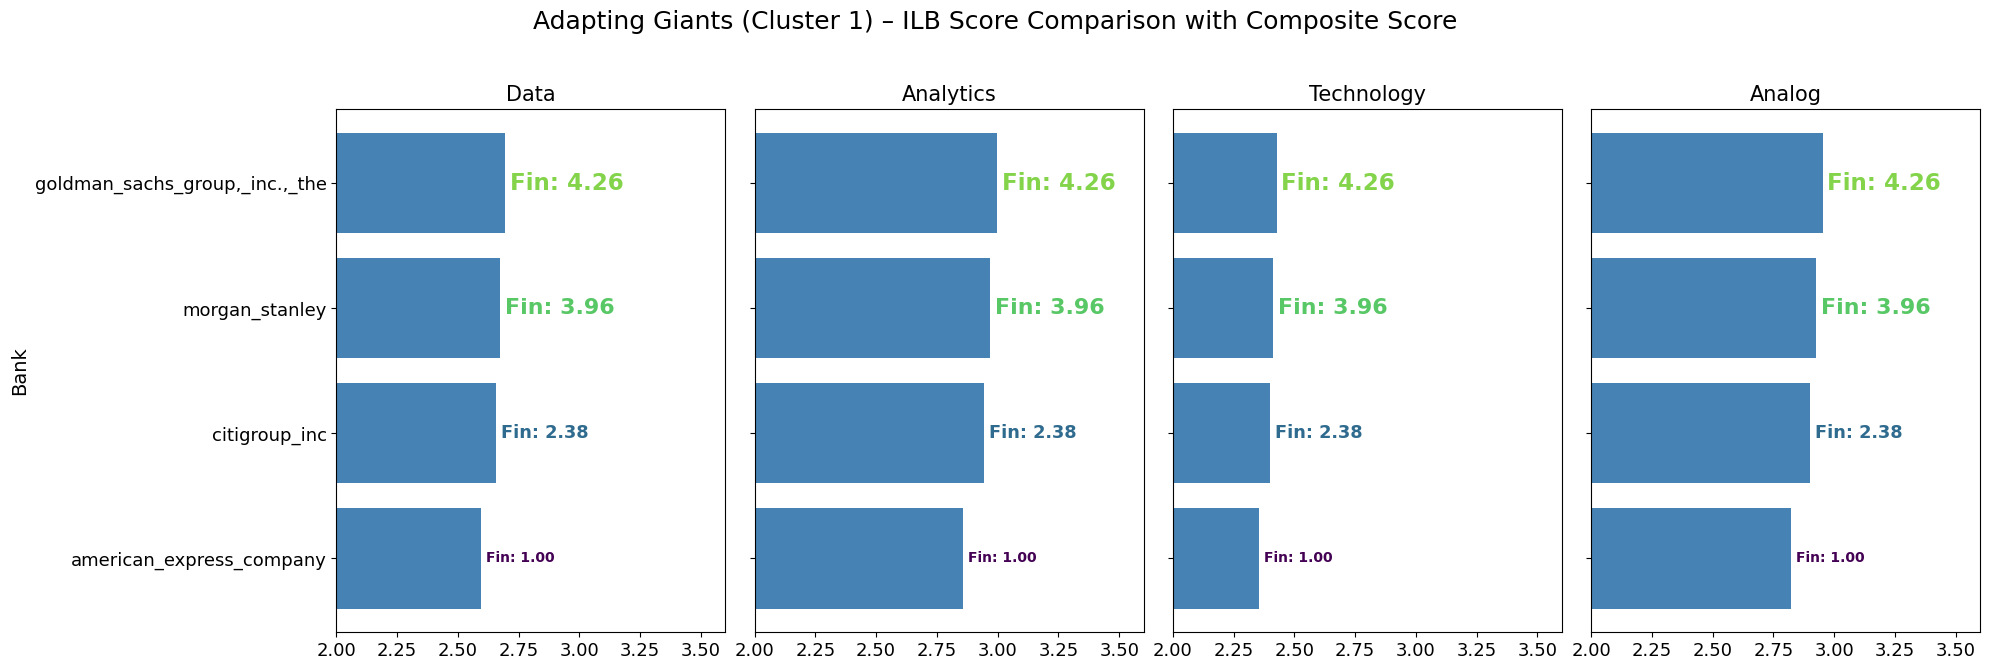

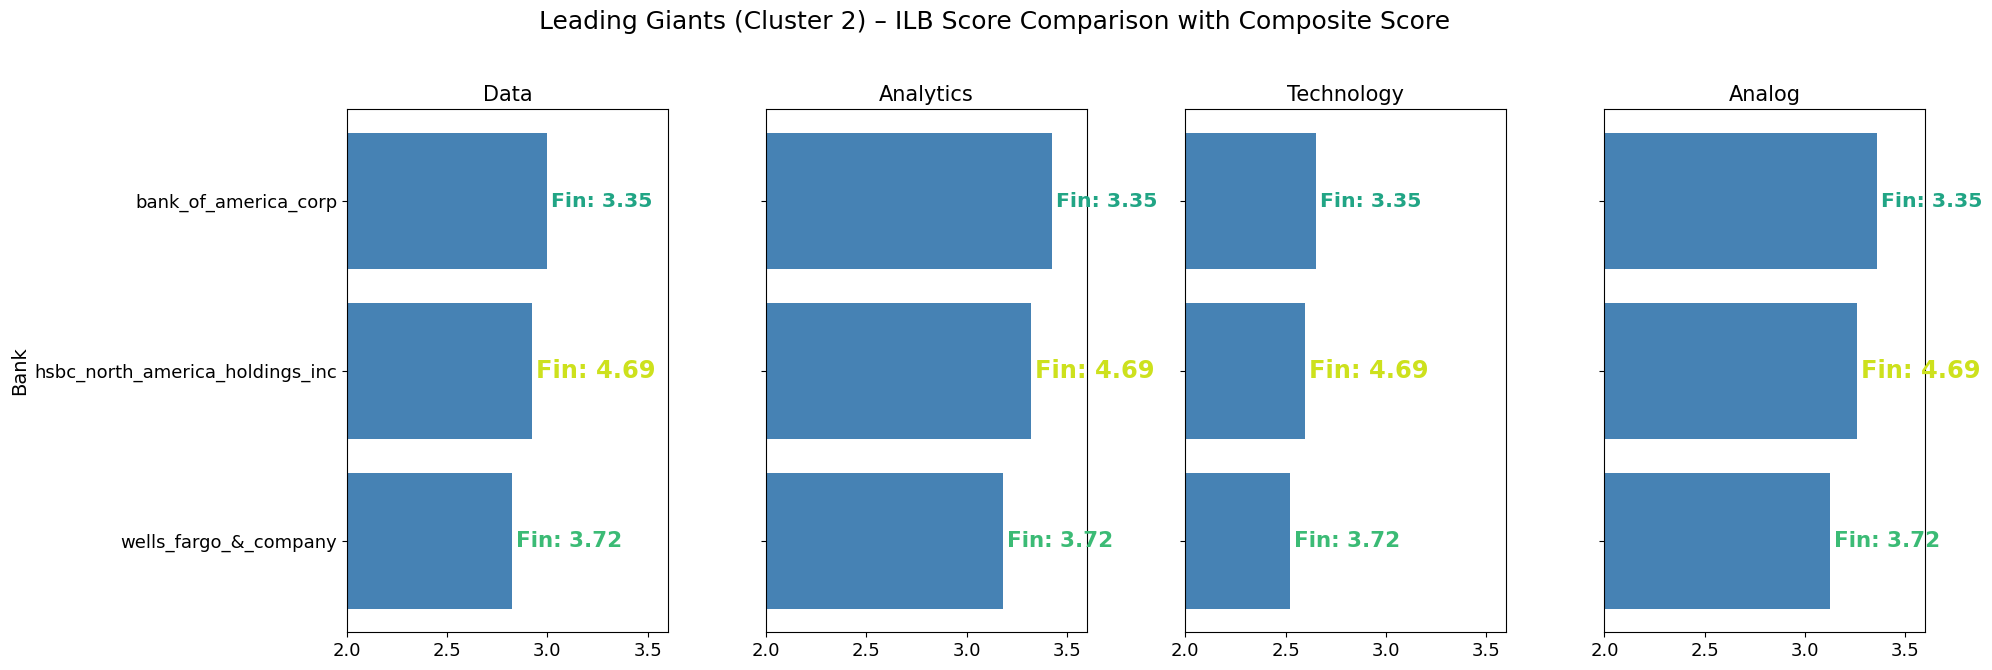

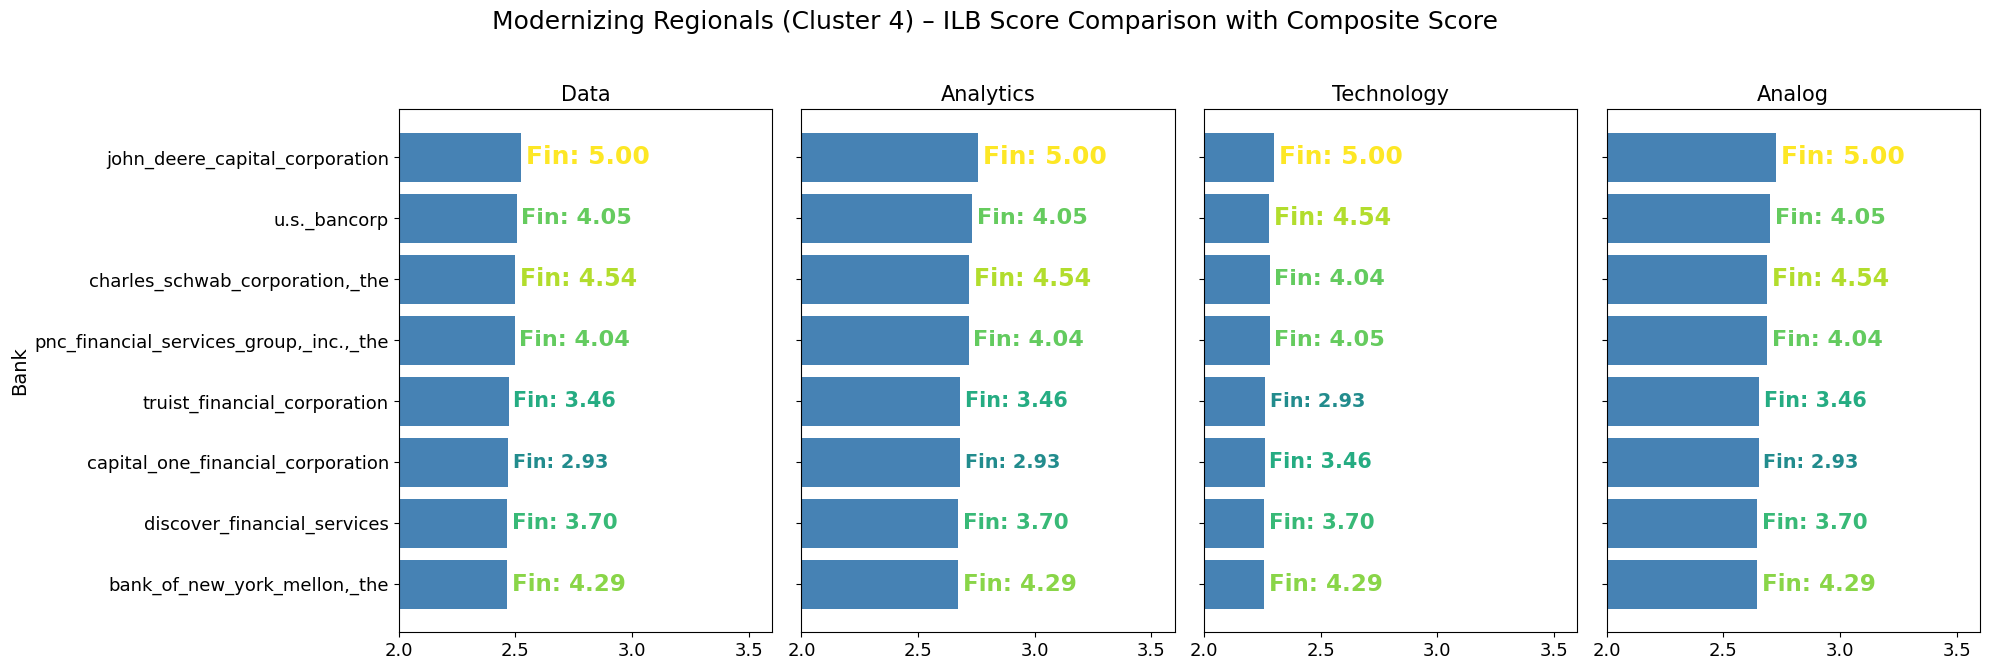

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Composite scores for each cluster
composite_scores_cluster_1 = [1.00, 2.38, 4.26, 3.96]
composite_scores_cluster_2 = [3.35, 4.69, 3.72]
composite_scores_cluster_4 = [4.29, 2.93, 4.54, 3.7, 5.0, 4.04, 3.46, 4.05]

# Define cluster data
cluster_data = {
    "Adapting Giants (Cluster 1)": {
        'Bank Name': [
            'american_express_company', 'citigroup_inc',
            'goldman_sachs_group,_inc.,_the', 'morgan_stanley'
        ],
        'Data_calibrated_score': [2.5968, 2.6574, 2.6952, 2.6742],
        'Analytics_calibrated_score': [2.8590, 2.9444, 2.9978, 2.9681],
        'Technology_calibrated_score': [2.3546, 2.3992, 2.4269, 2.4115],
        'Analog_calibrated_score': [2.8213, 2.9021, 2.9525, 2.9245],
        'Composite Score': composite_scores_cluster_1
    },
    "Leading Giants (Cluster 2)": {
        'Bank Name': [
            'bank_of_america_corp', 'hsbc_north_america_holdings_inc',
            'wells_fargo_&_company'
        ],
        'Data_calibrated_score': [3.0002, 2.9254, 2.8244],
        'Analytics_calibrated_score': [3.4278, 3.3223, 3.1799],
        'Technology_calibrated_score': [2.6512, 2.5962, 2.5220],
        'Analog_calibrated_score': [3.3595, 3.2596, 3.1249],
        'Composite Score': composite_scores_cluster_2
    },
    "Modernizing Regionals (Cluster 4)": {
        'Bank Name': [
            'bank_of_new_york_mellon,_the', 'capital_one_financial_corporation',
            'charles_schwab_corporation,_the', 'discover_financial_services',
            'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
            'truist_financial_corporation', 'u.s._bancorp'
        ],
        'Data_calibrated_score': [2.4631, 2.4698, 2.4975, 2.4641, 2.5249, 2.4969, 2.4708, 2.5053],
        'Analytics_calibrated_score': [2.6718, 2.6792, 2.7190, 2.6719, 2.7577, 2.7172, 2.6814, 2.7309],
        'Technology_calibrated_score': [2.2569, 2.2608, 2.2816, 2.2571, 2.3018, 2.2807, 2.2600, 2.2784],
        'Analog_calibrated_score': [2.6440, 2.6510, 2.6887, 2.6442, 2.7254, 2.6871, 2.6532, 2.7003],
        'Composite Score': composite_scores_cluster_4
    }
}

score_types = ['Data_calibrated_score', 'Analytics_calibrated_score',
               'Technology_calibrated_score', 'Analog_calibrated_score']

# Normalize composite scores for color mapping
norm = mcolors.Normalize(vmin=1.0, vmax=5.0)
# Use a more saturated colormap
cmap = cm.get_cmap('viridis')  # replaces RdYlGn for better contrast

# Plotting
for cluster_name, data in cluster_data.items():
    df = pd.DataFrame(data)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 7), sharey=True)
    fig.suptitle(f"{cluster_name} – ILB Score Comparison with Composite Score", fontsize=18)

    for i, score in enumerate(score_types):
        sorted_df = df.sort_values(score, ascending=True)
        axes[i].barh(sorted_df['Bank Name'], sorted_df[score], color='steelblue')
        axes[i].set_title(score.replace('_calibrated_score', ''), fontsize=15)
        axes[i].set_xlim(2, 3.6)
        axes[i].tick_params(labelsize=13)

        # Annotate composite score with size and stronger colors
        for j, (val, comp_score) in enumerate(zip(sorted_df[score], sorted_df['Composite Score'])):
            color = cmap(norm(comp_score))
            font_size = 10 + (comp_score - 1) * 2  # scale more
            axes[i].text(val + 0.02, j, f"Fin: {comp_score:.2f}",
                         va='center', fontsize=font_size, color=color, fontweight='bold')

        if i == 0:
            axes[i].set_ylabel("Bank", fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


<ipython-input-39-90aa71939d67>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


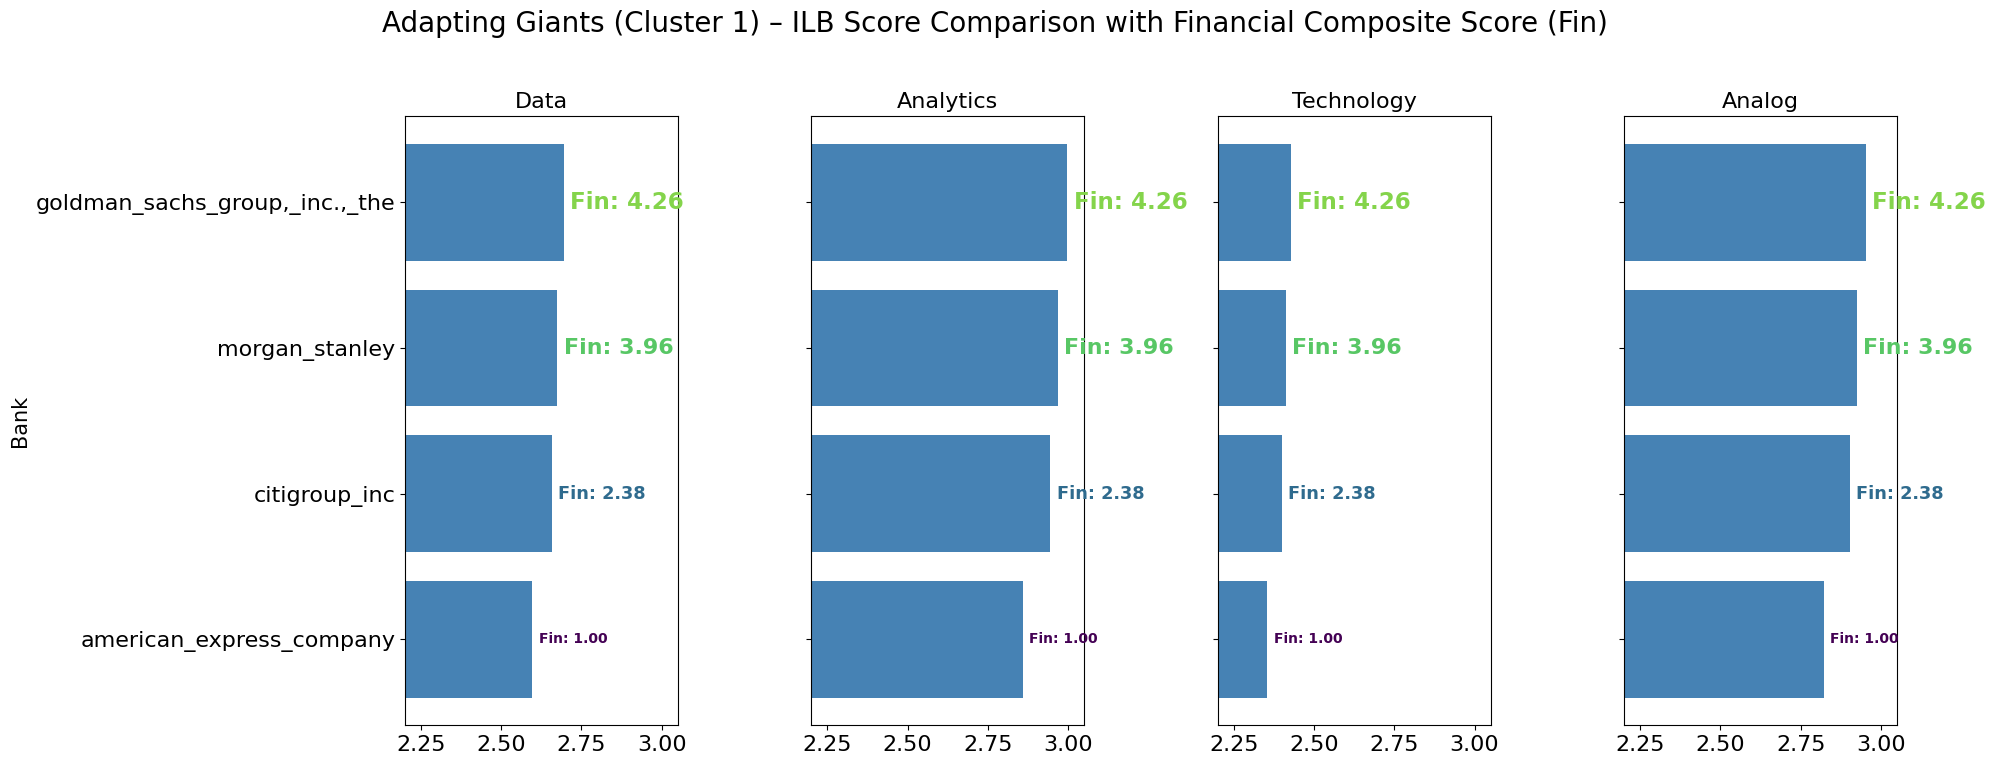

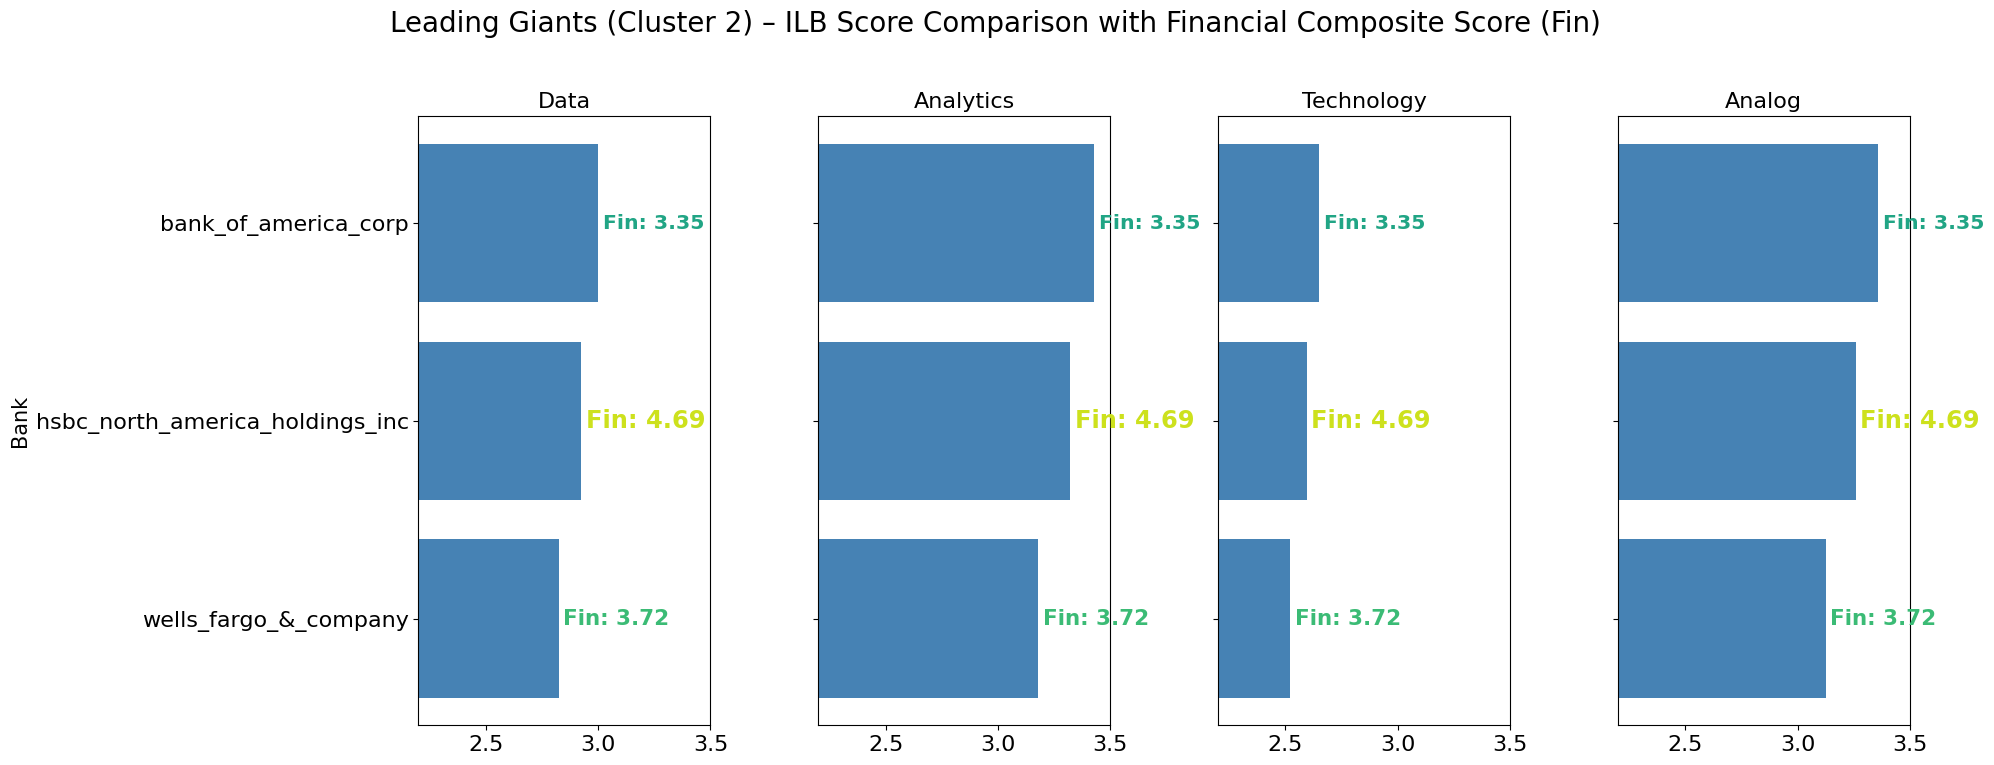

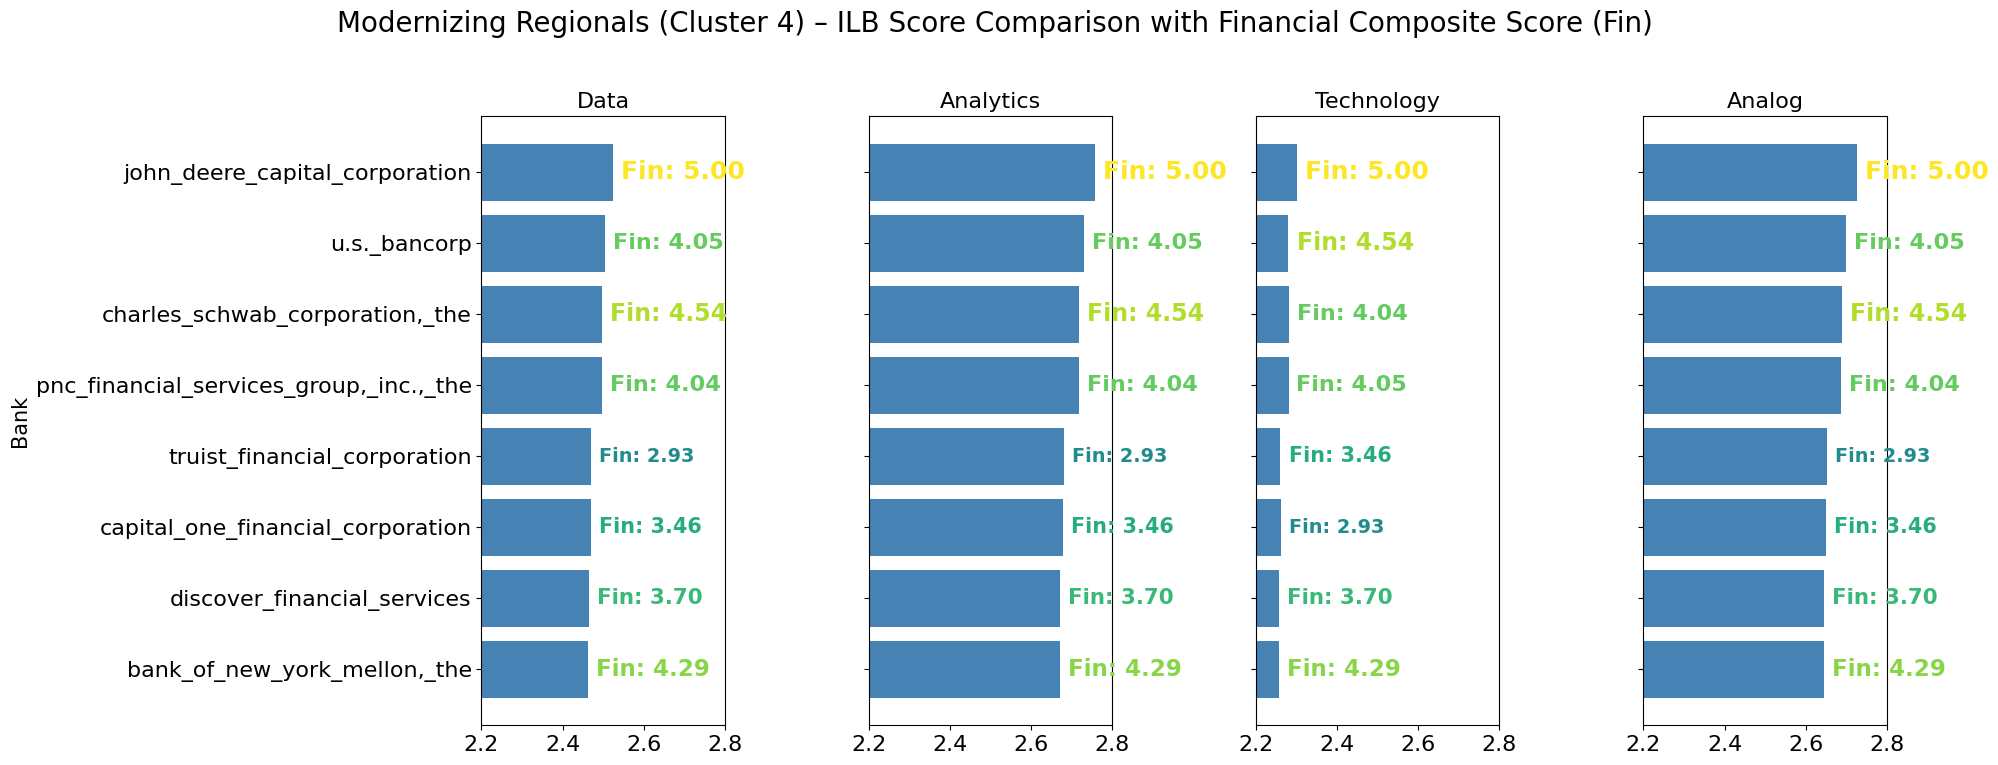

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Composite scores
composite_scores_cluster_1 = [1.00, 2.38, 4.26, 3.96]
composite_scores_cluster_2 = [3.35, 4.69, 3.72]
composite_scores_cluster_4 = [4.29, 3.46, 4.54, 3.7, 5.0, 4.04, 2.93, 4.05]


# Data
cluster_data = {
    "Adapting Giants (Cluster 1)": {
        'Bank Name': ['american_express_company', 'citigroup_inc',
                      'goldman_sachs_group,_inc.,_the', 'morgan_stanley'],
        'Data_calibrated_score': [2.5968, 2.6574, 2.6952, 2.6742],
        'Analytics_calibrated_score': [2.8590, 2.9444, 2.9978, 2.9681],
        'Technology_calibrated_score': [2.3546, 2.3992, 2.4269, 2.4115],
        'Analog_calibrated_score': [2.8213, 2.9021, 2.9525, 2.9245],
        'Composite Score': composite_scores_cluster_1
    },
    "Leading Giants (Cluster 2)": {
        'Bank Name': ['bank_of_america_corp', 'hsbc_north_america_holdings_inc',
                      'wells_fargo_&_company'],
        'Data_calibrated_score': [3.0002, 2.9254, 2.8244],
        'Analytics_calibrated_score': [3.4278, 3.3223, 3.1799],
        'Technology_calibrated_score': [2.6512, 2.5962, 2.5220],
        'Analog_calibrated_score': [3.3595, 3.2596, 3.1249],
        'Composite Score': composite_scores_cluster_2
    },
    "Modernizing Regionals (Cluster 4)": {
        'Bank Name': ['bank_of_new_york_mellon,_the', 'capital_one_financial_corporation',
                      'charles_schwab_corporation,_the', 'discover_financial_services',
                      'john_deere_capital_corporation', 'pnc_financial_services_group,_inc.,_the',
                      'truist_financial_corporation', 'u.s._bancorp'],
        'Data_calibrated_score': [2.4631, 2.4698, 2.4975, 2.4641, 2.5249, 2.4969, 2.4708, 2.5053],
        'Analytics_calibrated_score': [2.6718, 2.6792, 2.7190, 2.6719, 2.7577, 2.7172, 2.6814, 2.7309],
        'Technology_calibrated_score': [2.2569, 2.2608, 2.2816, 2.2571, 2.3018, 2.2807, 2.2600, 2.2784],
        'Analog_calibrated_score': [2.6440, 2.6510, 2.6887, 2.6442, 2.7254, 2.6871, 2.6532, 2.7003],
        'Composite Score': composite_scores_cluster_4
    }
}

score_types = ['Data_calibrated_score', 'Analytics_calibrated_score',
               'Technology_calibrated_score', 'Analog_calibrated_score']

norm = mcolors.Normalize(vmin=1.0, vmax=5.0)
cmap = cm.get_cmap('viridis')

for cluster_name, data in cluster_data.items():
    df = pd.DataFrame(data)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), sharey=True)
    fig.suptitle(f"{cluster_name} – ILB Score Comparison with Financial Composite Score (Fin)", fontsize=20)

    for i, score in enumerate(score_types):
        sorted_df = df.sort_values(score, ascending=True)
        axes[i].barh(sorted_df['Bank Name'], sorted_df[score], color='steelblue')
        axes[i].set_title(score.replace('_calibrated_score', ''), fontsize=16)

# Set tighter x-limits by cluster
        if "Cluster 4" in cluster_name:
          axes[i].set_xlim(2.2, 2.8)
        elif "Cluster 1" in cluster_name:
          axes[i].set_xlim(2.2, 3.05)
        elif "Cluster 2" in cluster_name:
          axes[i].set_xlim(2.2, 3.5)

        axes[i].tick_params(labelsize=16)

        # Annotate with composite scores
        for j, (val, comp_score) in enumerate(zip(sorted_df[score], sorted_df['Composite Score'])):
            color = cmap(norm(comp_score))
            font_size = 10 + (comp_score - 1) * 2
            axes[i].text(val + 0.02, j, f"Fin: {comp_score:.2f}",
                         va='center', fontsize=font_size, color=color, fontweight='bold')

        if i == 0:
            axes[i].set_ylabel("Bank", fontsize=15)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
